# IT3385 Assignment
Done by: Tan Zhi Ning (220843P)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from pycaret.regression import *
import mlflow

## Exploratory Data Analysis 

In [2]:
#1. Load data
df = pd.read_csv("01_Melbourne_Residential.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


In [3]:
#2. Finding the total number of rows(records of data) and columns in the dataset
print("Total number of rows and columns in the dataset: ", df.shape)

#3. Finding out the column types to see if there is any which needs to be converted for further analysis
print("\nFinding out the data types of each column: ")
print(df.info())

#4. Getting basic summary statistics to better understand the key features in the dataset
print("\nGetting basic summary statistics: ")
df.describe().transpose()

Total number of rows and columns in the dataset:  (13580, 21)

Finding out the data types of each column: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [4]:
#5. Print column names and data types
print("Column Names and Data Types:")
print(df.dtypes)

Column Names and Data Types:
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
Seller            object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Region            object
Propertycount      int64
dtype: object


Based on the above outputs, 

1. There is a total of **21 columns**, with **13,580 property records**.  
2. The dataset contains the following data types:  
   - 8 categorical (`object`) columns (`Suburb`, `Address`, `Type`, `Method`, `Seller`, `Date`, `CouncilArea`, `Region`).
   - 7 integer (`int64`) columns (`Rooms`, `Price`, `Postcode`, `Bedroom2`, `Bathroom`, `Landsize`, `Propertycount`).  
   - 6 float (`float64`) columns (`Distance`, `Car`, `BuildingArea`, `YearBuilt`, `Latitude`, `Longitude`).  
3. Missing values are present in several columns. Notably:  
   - `BuildingArea` (only ~7,130 non-null out of 13,580).  
   - `YearBuilt` (only ~8,205 non-null).  
   - `CouncilArea` (only ~12,211 non-null).  
   - All other columns are fully populated.  
   These missing values will need to be addressed in preprocessing.  
4. Summary statistics for key numerical columns:  
   - `Rooms`: Properties have between 1 and 10 rooms, with the majority (median = 3) having **2–3 rooms**.  
   - `Price`: Property prices range from $85,000 to $9,000,000, with a median of about $903,000. This indicates that there is strong variation within the values for this column.
   - `Distance`: Properties are located 6–48 km from Melbourne CBD, with a median of 9 km.  
   - `Bathroom`: Most properties have 1–2 bathrooms, with a maximum of 8.  
   - `Car`: Parking spots range from 0 to 10, with most properties providing 1–2 car spaces.  
   - `Landsize`: This column is highly skewed because while most properties have between 177 and 653 sqm, some land parcels extend to 43,310 sqm, indicating extreme outliers.  
   - `BuildingArea`: For the 7,130 properties with data, the size ranges from 11 to 4,515 sqm, with a median of 126 sqm. Again, extreme values are present.  
   - `YearBuilt`: The oldest recorded property dates back to 1196, while the newest is 2018. Most properties were built between the 1940s and 2000s, with a median around 1970.  
   - `Latitude` and `Longitude`: Values fall within expected ranges for Melbourne (~ -38 latitude, 145 longitude).  
   - `Propertycount`: Suburbs vary significantly, from 249 to 21,650 properties.  

Overall:  

The Melbourne Housing dataset provides rich information on property characteristics and pricing. However, it contains **missing values** (notably in `BuildingArea`, `YearBuilt`, and `CouncilArea`) and **outliers** (e.g., extreme land sizes). These issues will need to be cleaned or treated before building predictive models.  

---

Further dive into what each column represents:

| Column Name    | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `Suburb`       | Suburb of the residential property.                                         |
| `Address`      | Full address of the property.                                               |
| `Rooms`        | Number of rooms in the property.                                            |
| `Type`         | Type of dwelling: `h` = house, `u` = unit/duplex, `t` = townhouse, etc.     |
| `Price`        | Sale price of the property in Australian dollars (AUD).                     |
| `Method`       | Method of sale (e.g., `S` = Sold, `SP` = Sold Prior, `PI` = Passed In).     |
| `Seller`       | Name of the real estate agent/company that sold the property.               |
| `Date`         | Date the property was sold.                                                 |
| `Distance`     | Distance (in kilometers) from the property to Melbourne’s Central Business District (CBD). |
| `Postcode`     | Postal code of the property.                                                |
| `Bedroom2`     | Alternative/scraped number of bedrooms (cross-reference).                   |
| `Bathroom`     | Number of bathrooms.                                                        |
| `Car`          | Number of car spots/parking spaces.                                         |
| `Landsize`     | Land size of the property in square meters.                                 |
| `BuildingArea` | Building area of the property in square meters.                             |
| `YearBuilt`    | Year the property was originally constructed.                               |
| `CouncilArea`  | Governing council/municipality for the property.                            |
| `Latitude`     | Geographic latitude of the property location.                               |
| `Longitude`    | Geographic longitude of the property location.                              |
| `Region`       | Broader region of Melbourne in which the property is located.               |
| `Propertycount`| Number of properties recorded in the suburb.                                |


Clearer understanding of the differences between these columns:

| Term              | Definition                                                         | Example                                  |
| ----------------- | ------------------------------------------------------------------ | ---------------------------------------- |
| **Building Area** | Physical size of the **building** (measured in square meters)      | 120 sqm house                            |
| **Council Area**  | Local government or **municipality** jurisdiction for the property | City of Melbourne, City of Yarra         |
| **Suburb**        | A **neighborhood** or specific area within a city or town          | Malvern, Kew, Hawthorn, Richmond         |
| **Region**        | A **broader geographic area** that includes multiple suburbs       | Inner East, Outer East, Northern Suburbs |

In [5]:
#6. Checking for duplicated values
total_records = df.shape[0]

#Number of duplicated rows
num_duplicated = df.duplicated().sum()

# Percentage of duplicates
percentage_duplicated = (num_duplicated / total_records) * 100

print(f"Number of duplicated rows: {num_duplicated}")
print(f"Percentage of duplicated rows: {percentage_duplicated:.2f}%")

Number of duplicated rows: 0
Percentage of duplicated rows: 0.00%


Based on the output, there are no duplicate values in the dataset, meaning no cleaning is required for duplicate records.

In [6]:
#Checking for null values
null_counts = df.isnull().sum()

#percentage of missing values
null_percentage = (null_counts / len(df)) * 100

#combine the counts and percentage into a dataFrame
null_summary = pd.DataFrame({
    'Missing Values': null_counts,
    'Percentage': null_percentage
})

#round percentage to 2 decimal places
null_summary['Percentage'] = null_summary['Percentage'].round(2)

# Filter and print only the columns with null values
null_columns = null_summary[null_summary['Missing Values'] > 0]

print("Columns with null values and their count/percentage:\n")
null_columns

Columns with null values and their count/percentage:



,Missing Values,Percentage
Car,62,0.46
BuildingArea,6450,47.50
YearBuilt,5375,39.58
CouncilArea,1369,10.08


The output above highlights the columns with null values and the corresponding count of missing entries. 

| Column Name     | What It Represents                                                       | No. of Missing Values | Percentage of Missing Values |
|-----------------|---------------------------------------------------------------------------|------------------------|------------------------------|
| `Car`           | Number of car parking spaces                                               | 62                     | 0.46%                        |
| `BuildingArea`  | Building area of the property in square meters                            | 6450                   | 47.50%                       |
| `YearBuilt`     | Year the property was originally constructed                              | 5375                   | 39.58%                       |
| `CouncilArea`   | Governing council/municipality for the property                           | 1369                   | 10.08%                       |


In terms of how they will be dealt with, I had to take into consideration my business objective which in this case is to train a Machine Learning model to predict the **selling price** of a property in Melbourne based on its characteristics. These characteristics include **distance to the Central Business District (CBD)**, **land size**, **number of bedrooms**, **building area**, **age of the property**, and more. Accurate handling of missing values is critical for building a reliable predictive model.



---

Below is the approach I have decided to use to handle missing values in the dataset, keeping in mind the business objective:

For **`Car`**, the missing value percentage is very low (0.46% of the entire dataset). Since the percentage of missing values is minimal, I have decided to **remove** the rows with missing values for this feature. Imputing with the mean, median, or mode could introduce **skewness** into the data, especially when dealing with such a small amount of missing data. Given this, I believe that removing the rows with missing values will not significantly affect the overall dataset or the model’s performance.

As for **`BuildingArea`**, this feature is directly tied to my business objective, as it provides valuable insights into the **size of the property**, which is a key factor in determining its value. Since Building Area is a crucial feature for estimating property prices, I have decided to **impute the missing values** using the **median** value for properties that share similar characteristics such as **Suburb**, **Type**, and **Rooms**. Given that the values for **Building Area** seen in previous explanations, can sometimes be extreme, I believe that imputing with the **median** will prevent outliers from distorting the imputed values, whereas using the **mean** could cause issues due to the skewed distribution.

For **Year Built**, this feature helps determine the **age of the property**, which directly influences its value and is thus an important part of the prediction model. I have decided to **impute missing values** using the **mode** (most frequent value) based on combinations of **Council Area**, **Region**, and **Suburb**. The reasoning behind this is that properties within the same **Council Area**, **Region**, and **Suburb** were likely built around the same time, and using the **mode** will provide a reasonable estimate of the construction year for missing values, helping to align with the general trends in the dataset.

Finally, for **Council Area**, since this is an important feature that influences property pricing, I have opted to **impute** missing values rather than drop rows with missing **Council Area**. Dropping rows would lead to a significant reduction in the dataset size, which could negatively affect the performance of the model. Therefore, I have decided to **impute the missing values** based on the **mode** of **Region** and **Suburb** combinations, assuming that properties within the same **Region** and **Suburb** are most likely to belong to the same **Council Area**.


Summary of imputation strategies:
| Column Name     | Imputation Strategy                                                                                         |
|-----------------|------------------------------------------------------------------------------------------------------------|
| **`Car`**        | **Remove** rows with missing values, as the impact is minimal.                                               |
| **`BuildingArea`** | **Impute** using the **median** value for properties with similar **`Suburb`**, **`Type`**, and **`Rooms`**.     |
| **`YearBuilt`**  | **Impute** using the **mode** based on **`Council Area`**, **`Region`**, and **`Suburb`** combinations.             |
| **`CouncilArea`** | **Impute** using the **mode** based on **`Region`** and **`Suburb`** combinations.                              |


These imputation strategies are aligned with my **business objective** of predicting the property price accurately based on key features like **size**, **age**, and **location**.

In [7]:
# Quick check to see if all properties within the same suburb will have the same postcode
# Group by 'Suburb' and check if all postcodes are the same within each group
postcode_check = df.groupby('Suburb')['Postcode'].nunique()

# Display suburbs with more than 1 unique postcode
suburbs_multiple_postcodes = postcode_check[postcode_check > 1]

# Show the result
print("Suburbs with more than 1 unique postcode:")
print(suburbs_multiple_postcodes)

print("=" * 50)

# Check to see if all properties within the same suburb will have the same propertycount
# Group by 'Suburb' and check if all Propertycount values are the same within each group
propertycount_check = df.groupby('Suburb')['Propertycount'].nunique()

# Display suburbs with more than 1 unique Propertycount
suburbs_multiple_propertycounts = propertycount_check[propertycount_check > 1]

# Show the result
print("Suburbs with more than 1 unique Propertycount:")
print(suburbs_multiple_propertycounts)

Suburbs with more than 1 unique postcode:
Series([], Name: Postcode, dtype: int64)
Suburbs with more than 1 unique Propertycount:
Series([], Name: Propertycount, dtype: int64)


Based on the output, I can confirm that all properties within the same suburb have the same postcode, as there are no suburbs with multiple unique postcodes. This aligns with the expectation that properties in the same geographic area should share the same postcode.

Similarly, the Propertycount is consistent within each suburb, which is expected because Propertycount represents the number of properties in a given suburb. As the brief specifies that Propertycount is the count of properties within the same suburb, the output confirms this consistency across records in the dataset.

Overall, the results match expectations and were validated to ensure the data is correctly structured for further analysis.

In [8]:
# Checking if numeric columns contain values which are equal to or less than 0
# List of numeric columns (both int and float columns)
numeric_columns = ['Rooms', 'Price', 'Postcode', 'Bedroom2', 'Bathroom', 
                   'Landsize', 'Propertycount', 'Distance', 'Car', 'BuildingArea', 
                   'YearBuilt']

# Initialize an empty dictionary to store the results
outlier_info = {}

# Loop through each numeric column and check for values <= 0
for col in numeric_columns:
    # Filter the records where the value is <= 0
    outlier_records = df[df[col] <= 0]
    
    # Get the number of records and percentage of total
    count_outliers = outlier_records.shape[0]
    percentage_outliers = (count_outliers / df.shape[0]) * 100
    
    # Only store the results if there are outliers (count >= 1)
    if count_outliers >= 1:
        outlier_info[col] = {
            'Count': count_outliers,
            'Percentage': f"{percentage_outliers:.2f}"  # Formatting percentage to 2 decimal places
        }

# Convert the dictionary to a DataFrame for better display
outlier_summary = pd.DataFrame(outlier_info).T

# Display the result
print("Outliers (<=0) in Numeric Columns:")
print(outlier_summary)

Outliers (<=0) in Numeric Columns:
             Count Percentage
Bedroom2        16       0.12
Bathroom        34       0.25
Landsize      1939      14.28
Distance         6       0.04
Car           1026       7.56
BuildingArea    17       0.13


While checking the numeric columns, I found several records where the values are **0** or less, which is not expected. Here is a breakdown of the columns and how these values will be handled in the later stages using **PyCaret**.

1. **`Bedroom2`**:
   - **Number of records with values <= 0**: There are **16 records** where the `Bedroom2` column has values less than or equal to **0**.
   - However, in theory, the number of bedrooms cannot be **0** or negative, and these records are likely to be data entry errors.
   - Therefore, in the preprocessing step with **PyCaret**, I intend to **remove** these records as part of the data cleaning process.

2. **`Bathroom`**:
   - **Number of records with values <= 0**: There are **34 records** where `Bathroom` is less than or equal to **0**.
   - Logically, a property should always have at least one bathroom. Therefore, these records will also be **removed** during the setup process, especially since the percentage of these records is still low at **0.25%**. 

3. **`Landsize`**:
   - **Number of records with values <= 0**: **1939 records** (which is **14.28%** of the dataset) have `Landsize` values less than or equal to **0**.
   - `Landsize` is a critical feature for determining property prices(my business objective), this is a significant problem especially since a **negative or zero** land size is illogical.
   - Hence, instead of removing these records, I will **impute** the invalid `Landsize` values. Specifically, the missing or invalid values will be replaced with the **median** value of properties that share the same **Suburb**, **Number of Rooms**, and **Property Type**. 

4. **`Distance`**:
   - **Number of records with values <= 0**: There are **6 records** where `Distance` is less than or equal to **0**.
   - In cases where the properties are located within the CBD area, a `Distance` value of 0 km is logical, and I will leave these records unchanged. However, if any records contain negative distance values, I will remove these records as they represent invalid data.
   - This decision is based on the fact that there are **only 6 records** with values less than or equal to 0 in the `Distance` column, which constitutes a very small percentage of the dataset. Given this small proportion, removing these records will not significantly impact the overall dataset or the model's performance.

5. **`Car`**:
   - **Number of records with values <= 0**: There are **1026 records** where `Car` is less than or equal to **0**.
   - In the case of records with a `Car` value of 0, no cleaning will be done, as it is plausible for properties to have 0 allocated car spots. However, I will need to further investigate if there are any records with negative values for Car. If such records exist, I will assess the percentage of these records in the dataset to determine the best course of action for handling them.

6. **`BuildingArea`**:
   - **Number of records with values <= 0**: There are **17 records** where `BuildingArea` is less than or equal to **0**.
   - In a realistic scenario, it is not possible for a building area to be **0** or less. This likely indicates data entry mistakes.
   - Therefore, I will **impute** these values with the **median** of properties within the same **Suburb**, **Type**, and **Number of Rooms**.

By addressing these issues, it can better ensure that the dataset is consistent and the model will not be biased by erroneous or unrealistic values.

In [9]:
# Get records where 'Car' column has values less than 0
negative_car_records = df[df['Car'] < 0]

# Display the records with 'Car' values less than 0
print("Records where 'Car' is less than 0:")
print(negative_car_records)

Records where 'Car' is less than 0:
Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, Seller, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Region, Propertycount]
Index: []

[0 rows x 21 columns]


Based on the output, I observed that there are no records where the `Car` column (which represents the number of allocated parking spots) has a value less than 0. This is logical, as it’s not feasible for a property to have a negative number of parking spots. Therefore, no cleaning will be required for this column.

In [10]:
#8. Checking for values present in differing categorical columns
#List of columns to check
columns_to_check = ['Suburb', 'Type', 'Method', 'Seller', 'CouncilArea', 'Region']

#Value counts for different categorical columns
for col in columns_to_check:
    num_unique = df[col].nunique() 
    print(f"Number of unqiue {col}: {num_unique}")
    print(f"Value counts for '{col}':")
    print(df[col].value_counts().to_string()) #.to_string() to print all
    print("="*50)  # To separate each output

Number of unqiue Suburb: 314
Value counts for 'Suburb':
Suburb
Reservoir             359
Richmond              260
Bentleigh East        249
Preston               239
Brunswick             222
Essendon              220
South Yarra           202
Glen Iris             195
Hawthorn              191
Coburg                190
Northcote             188
Brighton              186
Kew                   177
Pascoe Vale           171
Balwyn North          171
Yarraville            164
St Kilda              162
Glenroy               159
Port Melbourne        153
Moonee Ponds          149
Carnegie              146
Thornbury             139
Bentleigh             139
Brighton East         138
Newport               137
Camberwell            132
Footscray             132
Elwood                131
Hampton               130
Ascot Vale            130
Surrey Hills          125
Prahran               123
Keilor East           121
Hawthorn East         119
Kensington            117
Malvern East          117
D

In the above set of codes, I decided to dive deeper into understanding the different categorical columns in the dataset to examine the **number of unique values** and the **value counts** of each value present. In the dataset, there is a total of **8 categorical columns** in the dataset: `Suburb`, `Address`, `Type`, `Method`, `Seller`, `Date`, `CouncilArea`, and `Region`.

However, I focused on the following **6 categorical columns**: `Suburb`, `Type`, `Method`, `Seller`, `CouncilArea`, and `Region`. This is because `Date` represents date values, and examining the counts of each specific date value does not provide much benefit. Similarly, `Address` contains a large number of unique entries, and analysing the individual addresses would not contribute meaningfully to understanding the dataset.

Based on the output from the other 6 categorical columns, here are the key observations:

- **`Suburb`**: There are **314 unique suburbs**, with "Reservoir" appearing the most frequently at **359** occurrences, while suburbs like "Whittlesea" and "Bacchus Marsh" appeared only once.
- **`Type`**: There are **3 unique property types**, with "h" (house) appearing **9449** times, "u" (unit/duplex) appearing **3017** times, and "t" (townhouse) appearing **1114** times.
- **`Method`**: There are **5 sale methods**, with the most common being "S" (Sold) at **9022** occurrences, followed by "SP" (Sold Prior) at **1703**, "PI" (Passed In) at **1564**, "VB" (Vendor Bid) at **1199**, and "SA" (Sold After Auction) at **92**.
- **`Seller`**: There are **268 unique sellers**, with "Nelson" being the top seller at **1565** properties sold. Some sellers like "Bowman" and "Clairmont" only sold one property each.
- **`CouncilArea`**: There are **33 unique council areas** that govern the properties, ranging from "Moreland" (1163 properties) to less common councils like "Moorabool" (1 property).
- **`Region`**: There are **8 unique regions**, with "Southern Metropolitan" having the highest count at **4695** properties, followed by "Northern Metropolitan" with **3890** properties.

These observations will help guide the next steps in preprocessing and feature engineering, ensuring the model is trained with the most relevant information.


<Figure size 600x400 with 0 Axes>

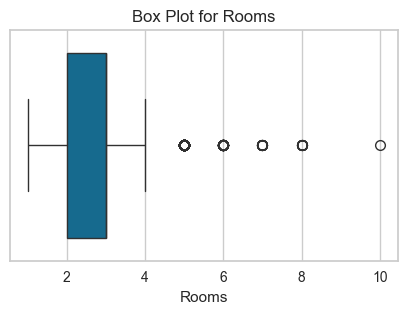

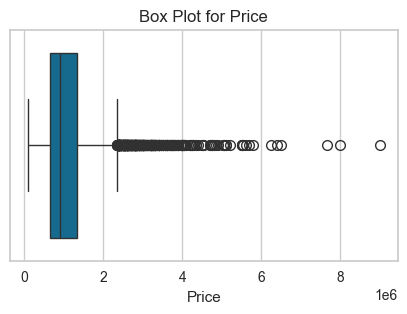

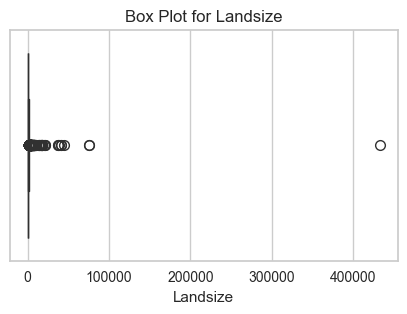

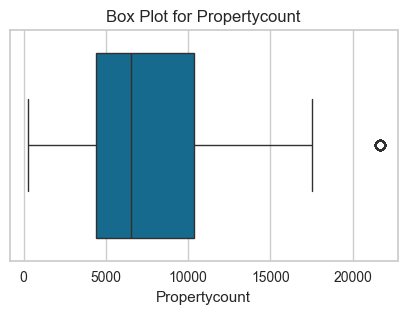

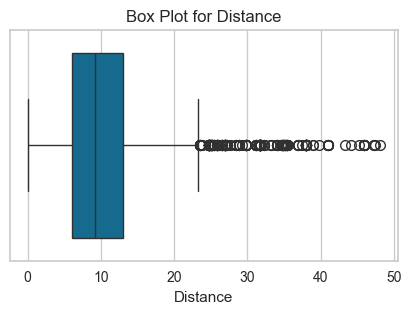

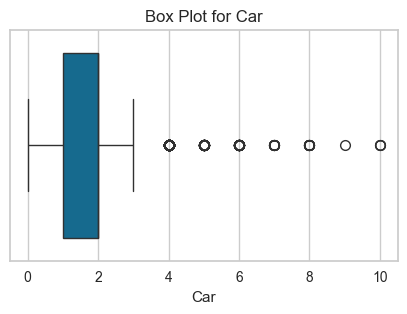

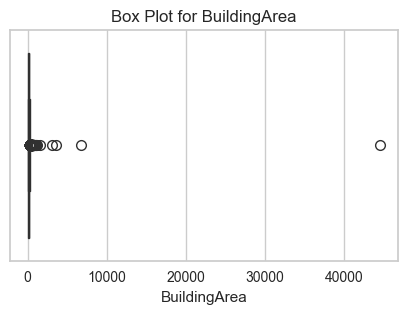

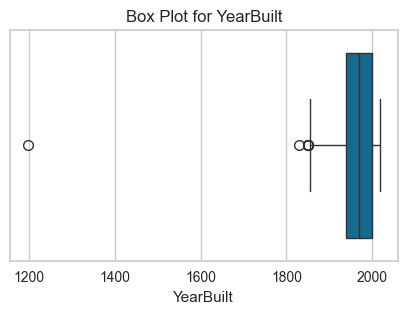

In [11]:
# List of columns for which we want to create box plots
columns_to_plot = ['Rooms', 'Price', 'Landsize', 'Propertycount', 'Distance', 'Car', 'BuildingArea', 'YearBuilt']

# Set up the plot size
plt.figure(figsize=(6, 4))

# Create box plots for each column
for col in columns_to_plot:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()

In the previous set of codes, the purpose was to generate box plots for various numeric columns in the dataset, helping to visualise the distribution and identify outliers in the data. The columns chosen for analysis include 'Rooms', 'Price', 'Landsize', 'Propertycount', 'Distance', 'Car', 'BuildingArea', and 'YearBuilt'. Each box plot provides a summary of the data’s minimum, first quartile (Q1), median, third quartile (Q3), and maximum values. Any data points outside of the "whiskers" (usually 1.5 times the interquartile range) are considered outliers.

---

Observations based on the box plots:

1. **`Rooms`**:
   - The whiskers extend from 0 to 4, indicating that most data points for the number of rooms fall within this range.
   - The box itself spans from 2 to 3 rooms, which means the interquartile range (IQR) lies between these values.
   - There are five dots beyond 5 rooms, indicating that there are some properties with an unusually high number of rooms that can be considered outliers.
   - To verify distirbution using a bar chart.

2. **`Price`**:
   - The box plot for Price shows a large spread with whiskers extending far to the right, suggesting that some properties have very high prices compared to the majority.
   - There are several outliers, indicating that a few properties are priced much higher than the others.
   - To investiagte for high-priced properties as they could be data errors present.

3. **`Landsize`**:
   - The whiskers in the Landsize box plot show a large range, extending up to about 400,000. This indicates the presence of some extremely large properties.
   - The box is very narrow, meaning most properties have a relatively small land size, with a few significant outliers.
   - Large land size could be outliers and should be further investigated.

4. **`Propertycount`**:
   - The box plot for Propertycount shows that most properties have a count between 5,000 and 15,000. The box is mostly centered, indicating a relatively even spread of values in this range.
   - There are some outliers, particularly with property counts exceeding 15,000.
   - Should also check for those property counts exceeding 15,000. This is because while a large property count may indicate a larger suburb, this should still be checked to see if it is inaccurate data.

5. **`Distance`**:
   - The Distance box plot shows that most properties are located within 10 kilometers of the city center, as the box spans this range.
   - However, there are several outliers extending to distances beyond 30 kilometers, indicating some properties are far from the central area, this extreme outliers in distance should be checked.
6. **`Car`**:
   - The box plot for the Car column shows a smaller range, with most values clustered around 2-3 cars.
   - There are several outliers on the higher end, which suggests some properties have unusually large car parks.
   - This can also be further investigated by getting the distribution of values from this column, using a bar chart.

7. **`BuildingArea`**:
   - The BuildingArea box plot has a wide spread with several outliers, especially at the higher end, showing that some properties have significantly larger buildings compared to others.
   - There is also a major outlier that is above 40,000, which should be further investigated.

8. **`YearBuilt`**:
   - The YearBuilt box plot shows that most buildings are relatively modern, with the bulk of the data clustered around 2000.
   - However, there seems to be an outlier where the property is said to be built way back in the 1200, this is something which needs to be investigated further.

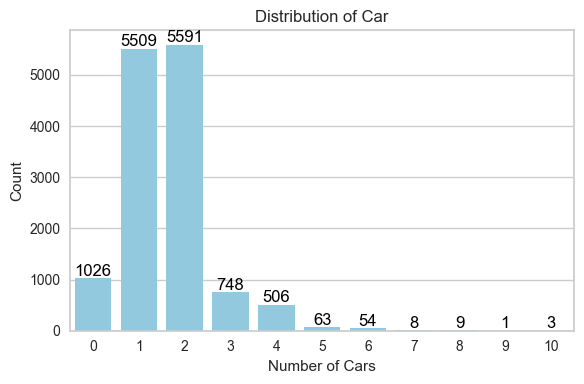

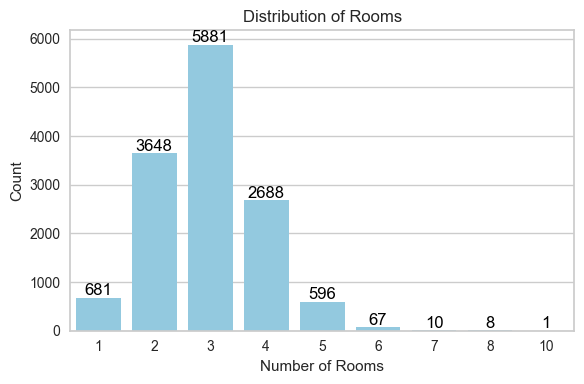

In [12]:
#Checking distribution for Rooms and Cars column using bar chart
# Drop rows where 'Car' is null temporarily and create a copy
df_non_null_car = df.dropna(subset=['Car']).copy()

# Ensure that the 'Car' column is treated as integers
df_non_null_car['Car'] = df_non_null_car['Car'].astype(int)

# Plot for 'Car' column (using non-null values)
plt.figure(figsize=(6, 4))
sns.countplot(x='Car', data=df_non_null_car, color='skyblue')  # Single solid color for bars
plt.title('Distribution of Car')
plt.xlabel('Number of Cars')
plt.ylabel('Count')

# Adding value labels on top of bars for 'Car'
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',  # Ensure whole numbers
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set the x-axis ticks to be integers (if necessary)
plt.xticks(range(df_non_null_car['Car'].min(), df_non_null_car['Car'].max() + 1))

plt.tight_layout()
plt.show()

# Plot for 'Rooms' column (using the original dataframe, no need to drop nulls for this column)
plt.figure(figsize=(6, 4))
sns.countplot(x='Rooms', data=df, color='skyblue')  # Single solid color for bars
plt.title('Distribution of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

# Adding value labels on top of bars for 'Rooms'
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',  # Ensure whole numbers
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Based on the analysis of the charts, I have decided that it would be best to **bin the outliers together**. This decision aligns with the goal of **predicting property prices**, as these features are directly linked to property characteristics and may significantly affect the model's predictions.

1. **`Car`**: I will **bin values greater than 4 parking spots together** into a category labeled **"More than 4"**. This approach helps retain extreme data points while simplifying the model's complexity for rare cases.
   
2. **`Rooms`**:  I will **bin values greater than 5 rooms together** into a category labeled **"More than 5"**. By grouping properties with more than 5 rooms together, we avoid overfitting the model to rare, extreme room counts while maintaining the impact of larger properties.

This binning process helps to keep those extreme values as part of the model, allowing the model to still recognise their potential impact on property pricing, without being overly influenced by rare outliers.

In [13]:
# Check for YearBuilt errors (e.g., properties built in 1200)
df[df['YearBuilt'] < 1800]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
10229,Mount Waverley,5 Armstrong St,3,h,1200000,VB,McGrath,24/06/2024,14.2,3149,...,1,4.0,807,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366


As seen from the output, this confirms an earlier observation regarding the `YearBuilt` outlier, where one record indicates a property was built in the year 1196. While such an extreme value is technically possible, I have decided to remove this record. The reason for this is that the value is excessively out of range and could disproportionately influence the model, potentially skewing predictions and leading to inaccurate results.

In [14]:
# Filter records where 'Propertycount' is greater than 20,000
high_propertycount_records = df[df['Propertycount'] > 20000]

# Print the filtered records
high_propertycount_records

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
160,Reservoir,1/21 Dumbarton St,3,u,475000,S,Ray,3/9/2023,11.2,3073,...,1,1.0,191,107.0,1990.0,Darebin,-37.70190,145.02560,Northern Metropolitan,21650
161,Reservoir,1/147 Purinuan Rd,2,u,415000,PI,Ray,3/9/2023,11.2,3073,...,1,1.0,189,84.0,2012.0,Darebin,-37.70800,145.01810,Northern Metropolitan,21650
406,Reservoir,30 Ashton St,3,h,731000,S,Barry,3/12/2023,11.2,3073,...,1,2.0,779,138.0,1950.0,Darebin,-37.72920,145.02140,Northern Metropolitan,21650
407,Reservoir,2/20 Crookston Rd,2,u,352000,SP,Barry,3/12/2023,11.2,3073,...,1,1.0,117,62.0,2012.0,Darebin,-37.71010,145.02230,Northern Metropolitan,21650
408,Reservoir,19 Drysdale St,3,h,723000,S,Ray,3/12/2023,11.2,3073,...,1,1.0,535,86.0,1950.0,Darebin,-37.72990,145.02420,Northern Metropolitan,21650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,Reservoir,2 Moira Av,3,h,605000,SP,Love,29/07/2024,12.0,3073,...,1,1.0,540,NaN,NaN,Darebin,-37.69372,144.98058,Northern Metropolitan,21650
13331,Reservoir,1/33 Oconnor St,2,t,672000,S,hockingstuart,29/07/2024,12.0,3073,...,1,1.0,243,120.0,2012.0,Darebin,-37.71045,145.00180,Northern Metropolitan,21650
13516,Reservoir,27 Ashton St,3,h,705000,S,Barry,30/07/2023,11.2,3073,...,1,1.0,437,NaN,1930.0,Darebin,-37.72910,145.02100,Northern Metropolitan,21650
13517,Reservoir,46 Bourke St,3,h,705000,S,Ray,30/07/2023,11.2,3073,...,1,3.0,513,NaN,NaN,Darebin,-37.72430,144.98830,Northern Metropolitan,21650


While there are records with an extreme `Propertycount` exceeding 20,000, the output reveals that all of these records are from the Reservoir suburb. Based on my understanding of the dataset, all properties within the same suburb should have the same `Propertycount`, and this is confirmed by the output. Specifically, when filtering for properties with a Propertycount greater than 20,000, we find **359 records**, which corresponds exactly to the number of properties listed under the Reservoir suburb.

While this value may initially seem extreme, it is logically consistent and entirely plausible, especially if Reservoir is significantly larger than other suburbs. Hence, there will be no data cleaning done regarding this extreme value found in `Propertycount`.

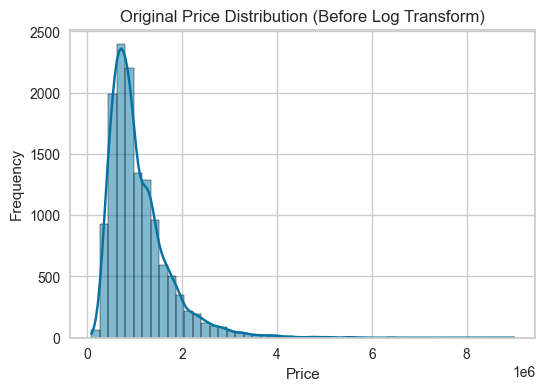

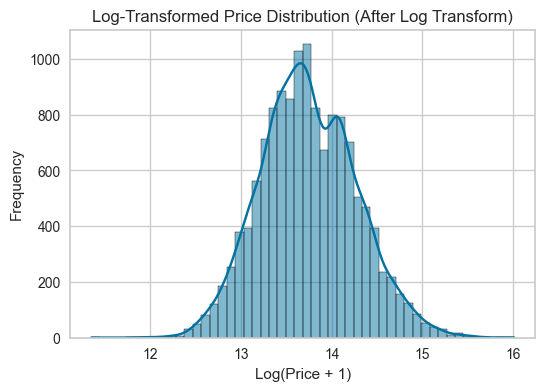

Original Price Stats (Before Transformation):
count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
50%      9.030000e+05
90%      1.850000e+06
95%      2.290050e+06
99%      3.338150e+06
max      9.000000e+06
Name: Price, dtype: float64

Log-Transformed Price Stats (After Transformation):
count    13580.000000
mean        13.745377
std          0.526786
min         11.350418
50%         13.713479
90%         14.430697
95%         14.644085
99%         15.020926
max         16.012735
Name: Log_Price, dtype: float64


In [15]:
# Create a copy of your dataset (don't modify the original df yet)
df_copy = df.copy()

# Plot distribution of 'Price' column in the original dataset (before log transformation)
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Original Price Distribution (Before Log Transform)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Apply log transformation to the copied dataset
df_copy['Log_Price'] = np.log1p(df_copy['Price'])  # Log transformation (log(x + 1))

# Plot distribution of 'Log_Price' column (after log transformation)
plt.figure(figsize=(6,4))
sns.histplot(df_copy['Log_Price'], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution (After Log Transform)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.show()

# Optionally: Check basic summary stats of both
print("Original Price Stats (Before Transformation):")
print(df['Price'].describe(percentiles=[0.90, 0.95, 0.99]))

print("\nLog-Transformed Price Stats (After Transformation):")
print(df_copy['Log_Price'].describe(percentiles=[0.90, 0.95, 0.99]))


In [16]:
# Sort the dataframe by 'Price' in descending order (highest price first)
df_sorted = df.sort_values(by='Price', ascending=False)

# Select the top 5% based on price
top_5_percent = df_sorted.head(int(0.05 * len(df)))

# Print the top 5% of the dataframe
top_5_percent

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
13289,Mulgrave,35 Bevis St,3,h,9000000,PI,Hall,29/07/2024,18.8,3170,...,1,1.0,744,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113
5196,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,13/05/2024,9.0,3126,...,5,4.0,2079,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265
7107,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,17/06/2024,5.3,3122,...,2,4.0,1690,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308
5459,Kew,15 Barry St,6,h,6500000,S,Jellis,13/08/2023,5.6,3101,...,6,3.0,1334,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331
4554,Middle Park,136 Page St,5,h,6400000,S,Marshall,9/9/2024,3.0,3206,...,2,1.0,553,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711,Fitzroy North,179 Barkly St,3,h,2300000,S,Nelson,23/04/2023,3.5,3068,...,1,2.0,475,NaN,NaN,Yarra,-37.77860,144.98460,Northern Metropolitan,6244
3229,Fitzroy,130 Gore St,3,h,2300000,S,Jellis,3/9/2024,2.1,3065,...,2,1.0,203,163.0,1890.0,NaN,-37.80475,144.98228,Northern Metropolitan,5825
640,Malvern,12 Hornsby St,4,h,2300000,S,Jellis,4/6/2023,7.4,3144,...,2,2.0,599,NaN,1977.0,Stonnington,-37.84930,145.03950,Southern Metropolitan,4675
4768,Ashburton,19 Ward St,3,h,2299500,S,Jellis,12/8/2024,10.2,3147,...,2,3.0,634,230.0,1940.0,Boroondara,-37.86516,145.07958,Southern Metropolitan,3052


In the above code, I performed a **log transformation** on the `Price` column to check if it manages to address the skewness of the data and bring it closer to a normal distribution. 

1. Original Distribution of Price
   - I first plotted the distribution of the `Price` column to check its shape. From the histogram, it is evident that the data is **right-skewed**, meaning there are a small number of high-priced properties that stretch the scale of the distribution.
   - The summary statistics of the original `Price` column show a mean of $1,075,684 and a max of $9,000,000, indicating a wide range of property prices. Specifically, the 90th percentile is around $1,850,000, but the 99th percentile is at $3,338,150, suggesting that a few extreme outliers could be influencing the model.

2. Log Transformation
   - To attempt to reduce the skew and make the data more suitable for machine learning models, I applied a **log transformation** to the `Price` column using the formula \( \log(x + 1) \). This transformation compresses the larger values, making the distribution more symmetric and easier to work with in models that assume normality.
   - After transforming, I plotted the new distribution of the `Log_Price` column, which shows a more **normal distribution** with a peak near the transformed mean value (13.75).

3. Comparison of Statistics
   - Before Transformation: The `Price` column has a mean of 1,075,684, a standard deviation of 639,310, and a max value of 9,000,000.
   - After Transformation: The `Log_Price` column now has a mean of 13.75, a standard deviation of 0.53, and a max value of 16.01. The transformed data is much less spread out and exhibits **less skew**, making it more suitable for modeling.

Based on my observations, the **log transformation** successfully reduced the impact of extreme values by compressing them, which helps in improving the performance of certain algorithms that are sensitive to outliers (like linear regression). The distribution of the log-transformed prices is now more balanced and normal, which is desirable for many machine learning models. The 99th percentile of the transformed data is 15.02, which is much closer to the rest of the data, compared to the original 99th percentile of $3,338,150.

In conclusion, the **log transformation** of the `Price` column has helped in normalizing the data, making it more appropriate for machine learning models that assume normality and are sensitive to skewness. The summary statistics before and after the transformation confirm that the data is now more evenly distributed, with reduced influence from extreme outliers. Hence, this will be applied in the later parts during preprocessing.

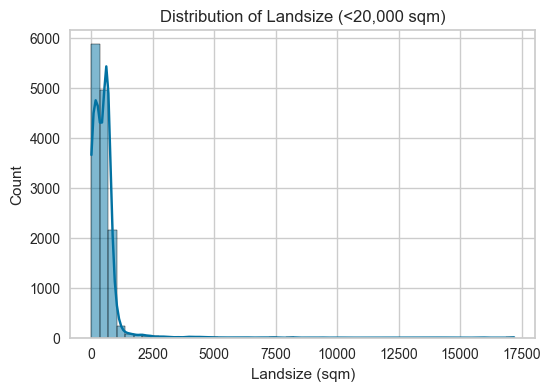

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
4895,Fitzroy,389 Gore St,3,h,2700000,VB,Kay,12/8/2024,2.1,3065,...,3,1.0,433014,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825
11717,Silvan,16 Eleanor Dr,3,h,1085000,S,Harcourts,27/05/2024,34.6,3795,...,2,2.0,76000,NaN,NaN,Yarra Ranges,-37.84739,145.47052,Eastern Victoria,457
12635,Balwyn North,9 Gildan St,3,h,2000000,VB,Kay,28/08/2023,9.2,3104,...,1,2.0,75100,NaN,NaN,Boroondara,-37.80020,145.07000,Southern Metropolitan,7809
9936,New Gisborne,71 Hamilton Rd,5,h,1355000,S,Raine,23/09/2024,48.1,3438,...,3,5.0,44500,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849
9747,Reservoir,14 Beenak St,3,h,572000,S,Ray,23/04/2023,11.2,3073,...,1,2.0,41400,NaN,NaN,Darebin,-37.71040,145.02570,Northern Metropolitan,21650
5826,Gisborne,21 Braeside Rd,4,h,807000,S,Raine,15/07/2024,45.9,3437,...,2,3.0,40468,NaN,NaN,Macedon Ranges,-37.50929,144.56444,Northern Victoria,3376
10306,Silvan,1 Parker Rd,4,h,1070000,S,Ray,24/06/2024,34.6,3795,...,2,3.0,38490,NaN,NaN,Yarra Ranges,-37.83229,145.43003,Eastern Victoria,457
2976,Maribyrnong,2/6 Horizon Dr,2,u,585000,S,Brad,3/6/2024,4.3,3032,...,2,2.0,37000,90.0,2004.0,Maribyrnong,-37.77518,144.89254,Western Metropolitan,4918
7697,Maribyrnong,44/2 Horizon Dr,2,u,495000,S,Brad,18/03/2024,8.7,3032,...,2,2.0,37000,NaN,NaN,Maribyrnong,-37.77520,144.89250,Western Metropolitan,4918
12978,Port Melbourne,55/4 Seisman Pl,2,u,1030000,S,Buxton,29/04/2024,3.8,3207,...,2,2.0,21715,99.0,2005.0,Port Phillip,-37.84240,144.94490,Southern Metropolitan,8648


In [17]:
# Plot histogram (cap at 20,000 sqm for readability)
plt.figure(figsize=(6,4))
sns.histplot(df[df['Landsize'] < 20000]['Landsize'], bins=50, kde=True)
plt.title("Distribution of Landsize (<20,000 sqm)")
plt.xlabel("Landsize (sqm)")
plt.ylabel("Count")
plt.show()

# Check extreme large land sizes
df[df['Landsize'] > 20000].sort_values(by='Landsize', ascending=False).head(10)

Based on the distribution as seen in the above output, `Landsize` is heavily right-skewed, same with `Price`. Therefore, I have decided that in the future preprocessing steps, I will apply a **log transformation** to the `Landsize` column. This transformation is necessary because the current distribution of the `Landsize` values is right-skewed, with some extreme outliers that could disproportionately influence the model. By taking the logarithm of the `Landsize` values, we will compress the large values, bringing them closer to the rest of the data and making the distribution more normal.

The log transformation is the best course of action because it reduces the impact of extreme values while preserving the relative differences between properties. This ensures that the model focuses on typical property sizes without being dominated by a few very large estates. Once the transformation is applied, the model will be able to learn from the data more effectively, as most machine learning algorithms perform better when the data is less skewed and more normally distributed.

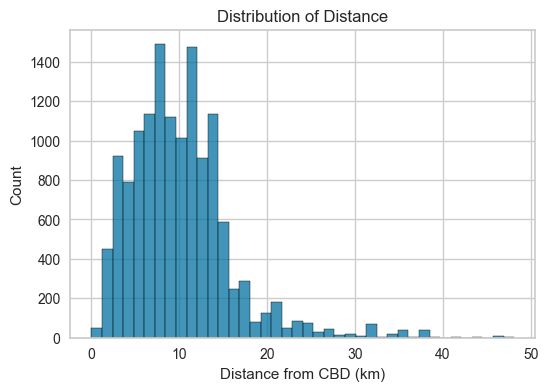

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
9936,New Gisborne,71 Hamilton Rd,5,h,1355000,S,Raine,23/09/2024,48.1,3438,...,3,5.0,44500,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849
10294,Riddells Creek,53 Bluegum Cct,4,h,817000,S,Raine,24/06/2024,47.4,3431,...,2,4.0,1459,272.4,2011.0,Macedon Ranges,-37.45709,144.68999,Northern Victoria,1475
10264,Pakenham,69 Willowtree Dr,4,h,410500,S,C21,24/06/2024,47.3,3810,...,2,2.0,425,NaN,NaN,Cardinia,-38.07474,145.45376,Eastern Victoria,17384
9376,Pakenham,1 Loxton Wy,4,h,643500,S,C21,22/07/2024,47.3,3810,...,2,2.0,600,300.0,2010.0,Cardinia,-38.07583,145.43698,Eastern Victoria,17384
5925,Pakenham,4 Toorang Ct,4,h,435000,S,C21,15/07/2024,47.3,3810,...,2,2.0,553,553.0,2005.0,Cardinia,-38.08699,145.48273,Eastern Victoria,17384
2570,Gisborne,3 Sansom St,4,h,521000,SP,Raine,1/7/2024,45.9,3437,...,2,2.0,978,144.0,1980.0,Macedon Ranges,-37.49642,144.60119,Northern Victoria,3376
5827,Gisborne,1/12 Rodney St,3,h,426000,S,Raine,15/07/2024,45.9,3437,...,1,1.0,412,103.0,1950.0,Macedon Ranges,-37.49175,144.59565,Northern Victoria,3376
7081,Gisborne,60 Hamilton St,3,h,540000,SA,McDonald,17/06/2024,45.9,3437,...,1,2.0,665,110.0,1930.0,Macedon Ranges,-37.48701,144.58567,Northern Victoria,3376
6764,Gisborne,7 Wyralla Cr,6,h,650000,SP,Raine,16/09/2024,45.9,3437,...,2,2.0,1301,NaN,NaN,NaN,-37.50733,144.58666,Northern Victoria,3376
5826,Gisborne,21 Braeside Rd,4,h,807000,S,Raine,15/07/2024,45.9,3437,...,2,3.0,40468,NaN,NaN,Macedon Ranges,-37.50929,144.56444,Northern Victoria,3376


In [18]:
# Histogram (focus on common ranges)
plt.figure(figsize=(6,4))
sns.histplot(df['Distance'], bins=40, kde=False)
plt.title("Distribution of Distance")
plt.xlabel("Distance from CBD (km)")
plt.ylabel("Count")
plt.show()

# Check properties farthest away
df[df['Distance'] > 40].sort_values(by='Distance', ascending=False).head(10)

In the above code, I checked the distribution of the `Distance` column to view how far the properties are from the Central Business District (CBD). By plotting the histogram, I was able to visualize the spread of the distances, which helped identify if there are any skewed values or patterns, which I was able to see that the distribution showed a right-skewed diagram.

Next, I examined the properties that are more than 40 km away from the CBD. From the output, I observed that these properties come from a few different suburbs and regions, suggesting that they could be 

Therefore, in the following code, I plan to explore the **top 1% of properties** with the **farthest distances** and investigate the **suburbs** within this top 1%. This will help me verify if all properties within a given suburb have high distance values, thereby confirming that these extreme distances are likely valid and not due to data entry errors or inconsistencies.

In [19]:
# Set Pandas to display all rows
pd.set_option('display.max_rows', None)

# Calculate the threshold for the top 5% of the 'Distance' column
distance_threshold = df['Distance'].quantile(0.99)

# Filter the dataset to get the top 5% records where the 'Distance' is the furthest
top_1_percent = df[df['Distance'] > distance_threshold]

# Get the count of each suburb within the top 5% records
suburb_counts = top_1_percent['Suburb'].value_counts()

# Get the total count of records per suburb in the original dataset
total_suburb_counts = df['Suburb'].value_counts()

# Calculate the percentage of records from each suburb in the top 5% of distances
suburb_percentage = (suburb_counts / total_suburb_counts) * 100

# Combine the count and percentage into a DataFrame for better display
suburb_summary = pd.DataFrame({
    'Count in Top 1%': suburb_counts,
    'Percentage in Top 1%': suburb_percentage
})

# Filter to only show suburbs that have records in the top 5% (i.e., not NaN)
suburb_summary = suburb_summary.dropna()

# Sort the results by 'Count in Top 5%' in descending order
suburb_summary = suburb_summary.sort_values(by='Count in Top 1%', ascending=False)

# Display the result
print("Suburb counts and percentages within the top 1% of furthest distances (Descending Order):")
suburb_summary.head(100)

Suburb counts and percentages within the top 1% of furthest distances (Descending Order):


,Count in Top 1%,Percentage in Top 1%
Suburb,,
Frankston,24.0,100.0
Frankston South,16.0,100.0
Seaford,14.0,100.0
Berwick,13.0,100.0
Carrum Downs,12.0,100.0
Gisborne,8.0,100.0
Narre Warren,7.0,100.0
Langwarrin,6.0,100.0
Hampton Park,4.0,100.0


Based on the output, I can see that for the records within the top 1% of the longest distances from the Central Business District (CBD), all properties within each suburb also fall within the top 1%. Specifically, the **count of properties** within each suburb is **100%** for the top 1% of the furthest distances, which indicates that all the properties in those suburbs are among the ones located the furthest away from the CBD.

This confirms that the extreme distances are **valid and factual**, as they reflect the properties within the same suburb, all having high distances between the property and the CBD area. Therefore, these high distance values are not due to data entry errors, but rather represent actual properties in suburbs that are naturally located farther from the city center.

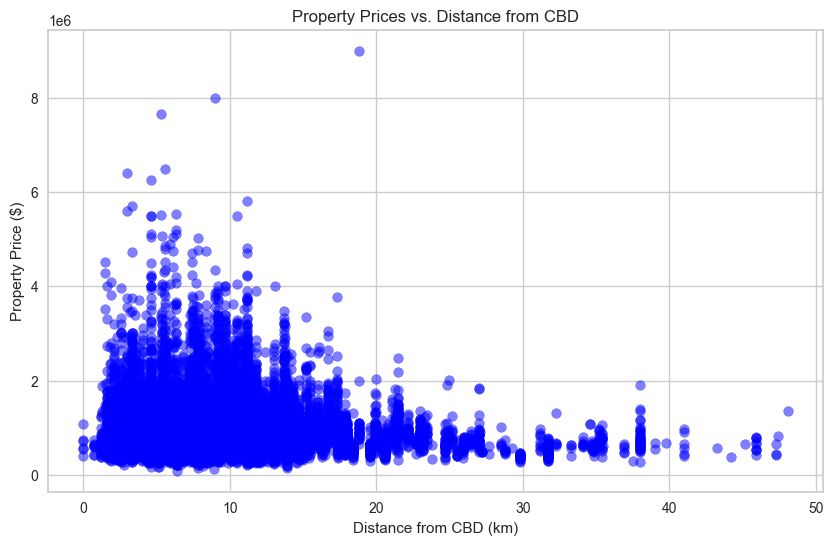

In [20]:
# Scatter plot for property prices vs. distance from CBD
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Price'], alpha=0.5, color='blue')
plt.title('Property Prices vs. Distance from CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price ($)')
plt.show()

Based on the scatter plot between property prices and distance from the CBD, it is evident that as the distance from the CBD increases, the property prices tend to decrease. This negative correlation makes sense when considering the actual context of the real estate market. Properties located further away from the city center generally have lower prices due to factors such as reduced accessibility, fewer amenities, and a greater distance from key commercial areas.

Therefore, I have decided **not to perform any preprocessing** on the `Distance` column. The extreme values, or outliers, observed in the data are valid and factual. These outliers reflect properties in suburbs naturally located farther from the CBD, and removing them would distort the real-world relationship between property prices and distance. As such, keeping these data points ensures that the analysis and model remain consistent with actual market behavior.

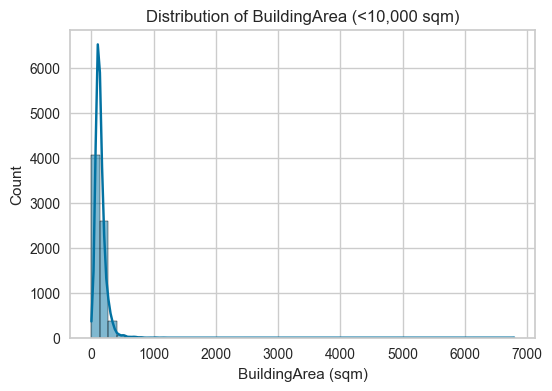

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
9936,New Gisborne,71 Hamilton Rd,5,h,1355000,S,Raine,23/09/2024,48.1,3438,...,3,5.0,44500,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849


In [21]:
# Plot histogram (cap at 10,000 sqm for readability)
plt.figure(figsize=(6, 4))
sns.histplot(df[df['BuildingArea'] < 10000]['BuildingArea'], bins=50, kde=True)
plt.title("Distribution of BuildingArea (<10,000 sqm)")
plt.xlabel("BuildingArea (sqm)")
plt.ylabel("Count")
plt.show()

# Check extreme large building areas
df[df['BuildingArea'] > 10000].sort_values(by='BuildingArea', ascending=False).head(10)

Based on the output, I can observe that the `BuildingArea` feature contains values predominantly **below 10,000 square meters**. However, there is a **singular record** with an extreme value of **44,515 square meters**. Given that this value is significantly higher than the rest of the records and appears to be an outlier, I have decided to remove this record during the preprocessing phase to maintain the integrity of the dataset.

The percentage of records affected by this extreme value is very low, so removing it will not substantially impact the dataset but will help improve the model’s accuracy by reducing the influence of outliers.

---

## Summary of cleaning steps to be done!

Now that I have completed my EDA, here is a summary of cleaning steps to be done.

| Type of Issue Found     | Column         | Action                                                                 |
|-------------------------|----------------|------------------------------------------------------------------------|
| Null Values             | `Car`          | Remove records with missing values                                      |
| Null Values             | `BuildingArea` | Impute using the median of properties with similar `Suburb`, `Type`, `Rooms` |
| Null Values             | `YearBuilt`    | Impute using the **mode** based on **`Council Area`**, **`Region`**, and **`Suburb`** |
| Null Values             | `CouncilArea`  | Impute using the **mode** based on **`Region`** and **`Suburb`** combinations |
| Numeric <= 0            | `Bedroom2`     | Remove records where `Bedroom2` is less than or equal to 0             |
| Numeric <= 0            | `Bathroom`     | Remove records where `Bathroom` is less than or equal to 0             |
| Numeric <= 0            | `Landsize`     | Impute using the median value based on properties sharing the same `Suburb`, `Number of Rooms`, and `Property Type` |
| Numeric <= 0            | `Distance`     | Remove records where `Distance` is less than 0                         |
| Numeric <= 0            | `BuildingArea` | Impute using the median of properties within the same `Suburb`, `Type`, and `Rooms` |
| Outliers                | `Car`          | Bin values greater than 4 parking spots together                       |
| Outliers                | `Rooms`        | Bin values greater than 5 rooms together                               |
| Outliers                | `YearBuilt`    | Remove records where value is before 1800                              |
| Outliers                | `Price`        | Apply log transformation                                               |
| Outliers                | `Landsize`     | Apply log transformation                                               |
| Outliers                | `BuildingArea` | Remove records where `BuildingArea` is more than 10,000                |

---

## Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret. (10 marks)


In [22]:
# 1) Drop records with extreme YearBuilt values, those before 1800, but keeping null values as well
df = df[(df['YearBuilt'] >= 1800) | (df['YearBuilt'].isnull())]

df_before_1800 = df[df['YearBuilt'] < 1800]
df_before_1800

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount


In [23]:
#Check the data type of 'Car' and 'Rooms' columns
print(f"Data type of 'Car' column: {df['Car'].dtype}")
print(f"Data type of 'Rooms' column: {df['Rooms'].dtype}")

Data type of 'Car' column: float64
Data type of 'Rooms' column: int64


In [24]:
#Checking for values with decimals and is not null within Car column
# Filter records where 'Car' has non-whole numbers and is not null
non_whole_numbers_non_null = df[(df['Car'].astype(float) % 1 != 0) & (df['Car'].notnull())]

# Print the records with non-whole number values and non-null values in 'Car'
print(f"Records from 'Car' where values are not whole numbers and not null:\n")
non_whole_numbers_non_null

Records from 'Car' where values are not whole numbers and not null:



,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount


Based on the output, it shows that the `Car` column, the values are currently float values like `1.0`, `2.0`, `3.0`, etc., even though the logical meaning of these values should be whole numbers (integers). However, there are no records in `Car` that are non-whole numbers or null. Therefore, in the following codes, I will convert `Car` to a categorical column (to treat it as a categorical variable with specific categories). Remove the ".0" at the end of each value so that 1.0 becomes 1, 2.0 becomes 2, etc and to categorise the values into predefined categories, such as "More than 4" for values greater than 4.

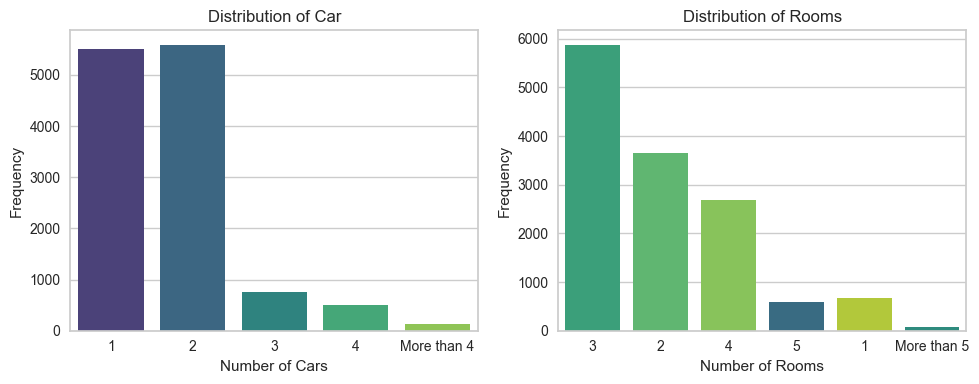

In [25]:
#2) Binning outliers
#remove records where 'Car' value is null and store in a temporary dataframe
df_null_car = df[df['Car'].isnull()]  # Temporary DataFrame for records where 'Car' is null
df_no_null_car = df.dropna(subset=['Car'])  # Keep only records where 'Car' is not null

#convert 'Car' and 'Rooms' to integers to remove decimal places
df_no_null_car['Car'] = df_no_null_car['Car'].apply(lambda x: int(x) if pd.notnull(x) else x)
df_no_null_car['Rooms'] = df_no_null_car['Rooms'].apply(lambda x: int(x) if pd.notnull(x) else x)

#convert 'Car' and 'Rooms' to categorical with string datatype (categorical)
df_no_null_car['Car'] = df_no_null_car['Car'].astype(str)
df_no_null_car['Rooms'] = df_no_null_car['Rooms'].astype(str)

#Bin outliers:
df_no_null_car['Car'] = np.where(df_no_null_car['Car'].astype(float) > 4, 'More than 4', df_no_null_car['Car'])
df_no_null_car['Rooms'] = np.where(df_no_null_car['Rooms'].astype(float) > 5, 'More than 5', df_no_null_car['Rooms'])

#order to be prineted
car_order = ['1', '2', '3', '4', 'More than 4']
rooms_order = ['1', '2', '3', '4', '5', 'More than 5']

#convert 'Car' and 'Rooms' to categorical types with the correct order
df_no_null_car['Car'] = pd.Categorical(df_no_null_car['Car'], categories=car_order, ordered=True)
df_no_null_car['Rooms'] = pd.Categorical(df_no_null_car['Rooms'], categories=rooms_order, ordered=True)

#combine the records with null 'Car' values back into the original DataFrame
df_final = pd.concat([df_no_null_car, df_null_car], axis=0)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=df_final['Car'], palette='viridis')
plt.title('Distribution of Car')
plt.xlabel('Number of Cars')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.countplot(x=df_final['Rooms'], palette='viridis')
plt.title('Distribution of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [26]:
# 3) Remove Rows with Unrealistic Values
df = df[df['Bedroom2'] > 0]  # Remove rows where Bedroom2 <= 0
df = df[df['Bathroom'] > 0]  # Remove rows where Bathroom <= 0
df = df[df['Distance'] >= 0]  # Remove rows where Distance < 0

In [27]:
# 4) Replace values <= 0 in 'Landsize' and 'BuildingArea' with NaN
df['Landsize'] = np.where(df['Landsize'] <= 0, np.nan, df['Landsize'])
df['BuildingArea'] = np.where(df['BuildingArea'] <= 0, np.nan, df['BuildingArea'])

buildingarea_invalid_count = df[df['BuildingArea'] <= 0].shape[0]
landsize_invalid_count = df[df['Landsize'] <= 0].shape[0]
print(f"Number of invalid 'BuildingArea' records (<= 0): {buildingarea_invalid_count}")
print(f"Number of invalid 'Landsize' records (<= 0): {landsize_invalid_count}")

Number of invalid 'BuildingArea' records (<= 0): 0
Number of invalid 'Landsize' records (<= 0): 0


In [28]:
# 5) Apply Log Transformations for Price, Landsize
df['Price'] = np.log1p(df['Price'])  # Log transform Price
df['Landsize'] = np.log1p(df['Landsize'])  # Log transform Landsize

In [29]:
# 6) Treat 'YearBuilt' as Categorical
df['YearBuilt'] = df['YearBuilt'].astype('category')

In [30]:
#7) Remove records where 'BuildingArea' is more than 10,000 and keep NaN values
df = df[(df['BuildingArea'] <= 10000) | (df['BuildingArea'].isnull())]


records_above_10000 = df[df['BuildingArea'] > 10000]
print(f"Records where BuildingArea is greater than 10,000:")
records_above_10000

Records where BuildingArea is greater than 10,000:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount


In [31]:
#8) Having an age column replace YearBuilt
# Assuming df is your DataFrame and 'YearBuilt' is the column we want to use
current_year = datetime.now().year 

# Calculate age from 'YearBuilt' while keeping nulls as they are
df['Age'] = df['YearBuilt'].apply(lambda x: current_year - x if pd.notnull(x) else np.nan)

# Print the first few rows to check the result
df[['YearBuilt', 'Age']].head()

,YearBuilt,Age
0,2016.0,9.0
1,1900.0,125.0
2,NaN,NaN
3,1930.0,95.0
4,2013.0,12.0


In [32]:
# Drop the 'YearBuilt' column from the DataFrame
df = df.drop(columns=['YearBuilt'])

# Print the first few rows to verify the column is dropped
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Region,Propertycount,Age
0,Airport West,154 Halsey Rd,3,t,13.641158,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,5.717028,225.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464,9.0
1,Albert Park,105 Kerferd Rd,2,h,14.058458,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,4.795791,82.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280,125.0
2,Albert Park,85 Richardson St,2,h,14.190517,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,5.075174,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280,NaN
3,Alphington,6 Smith St,4,h,14.508658,S,Brace,3/9/2023,6.4,3078,...,2,4.0,6.749931,263.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211,95.0
4,Alphington,5/6 Yarralea St,3,h,13.919871,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,5.342334,NaN,Yarra,-37.7854,145.0325,Northern Metropolitan,2211,12.0


In [33]:
# Define the bin edges for custom ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]  # Last bin is >100
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '>100']

# Assuming 'df' is your dataframe and 'Age' is the column to be binned
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Check the result to ensure 'Age' is replaced with the binned categories
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Region,Propertycount,Age
0,Airport West,154 Halsey Rd,3,t,13.641158,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,5.717028,225.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464,0-10
1,Albert Park,105 Kerferd Rd,2,h,14.058458,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,4.795791,82.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280,>100
2,Albert Park,85 Richardson St,2,h,14.190517,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,5.075174,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280,NaN
3,Alphington,6 Smith St,4,h,14.508658,S,Brace,3/9/2023,6.4,3078,...,2,4.0,6.749931,263.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211,91-100
4,Alphington,5/6 Yarralea St,3,h,13.919871,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,5.342334,NaN,Yarra,-37.7854,145.0325,Northern Metropolitan,2211,11-20


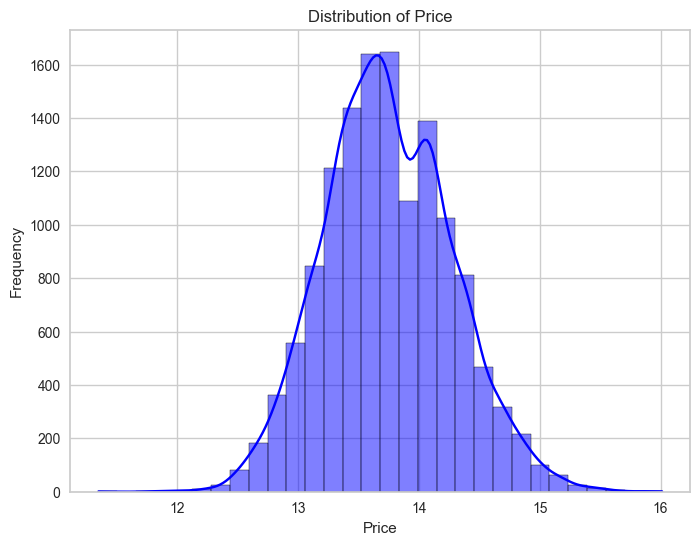

In [34]:
#distribution of the 'Price' column using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, color='blue', bins=30)  # kde=True adds a kernel density estimate
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [35]:
#Checking for null values
null_counts = df.isnull().sum()

#percentage of missing values
null_percentage = (null_counts / len(df)) * 100

#combine the counts and percentage into a dataFrame
null_summary = pd.DataFrame({
    'Missing Values': null_counts,
    'Percentage': null_percentage
})

#round percentage to 2 decimal places
null_summary['Percentage'] = null_summary['Percentage'].round(2)

# Filter and print only the columns with null values
null_columns = null_summary[null_summary['Missing Values'] > 0]

print("Columns with null values and their count/percentage:\n")
null_columns

Columns with null values and their count/percentage:



,Missing Values,Percentage
Car,62,0.46
Landsize,1919,14.18
BuildingArea,6428,47.50
CouncilArea,1368,10.11
Age,5337,39.43


After cleaning the data as much as possible, I will handle the remaining issues, specifically the null values, using PyCaret's setup() function for further preprocessing.


| **Column**     | **Type of Column** | **Action**            |
| -------------- | ------------------ | --------------------- |
| `Car`          | **Categorical**    | Impute using **mode** |
| `Age`          | **Categorical**    | Impute using **mode** |
| `BuildingArea` | **Numeric**        | Impute using **mean** |
| `CouncilArea`  | **Categorical**    | Impute using **mode** |
| `Landsize`     | **Numeric**        | Impute using **mean** |


In [36]:
# Define the columns you want to keep (including 'Price')
columns_to_keep = ['Type', 'Region', 'Age', 'Distance', 'BuildingArea', 'Landsize', 'Bedroom2', 'Price']

# Filter the dataframe to keep only the specified columns
df = df[columns_to_keep]

In [37]:
# Print all column names in the DataFrame
print("Columns in the dataset:")
print(df.columns.tolist())  # Convert to list for easier readability
df.head()

Columns in the dataset:
['Type', 'Region', 'Age', 'Distance', 'BuildingArea', 'Landsize', 'Bedroom2', 'Price']


,Type,Region,Age,Distance,BuildingArea,Landsize,Bedroom2,Price
0,t,Western Metropolitan,0-10,13.5,225.0,5.717028,3,13.641158
1,h,Southern Metropolitan,>100,3.3,82.0,4.795791,2,14.058458
2,h,Southern Metropolitan,NaN,3.3,NaN,5.075174,2,14.190517
3,h,Northern Metropolitan,91-100,6.4,263.0,6.749931,3,14.508658
4,h,Northern Metropolitan,11-20,6.4,NaN,5.342334,3,13.919871


In [40]:
#using pycaret setup()!!, specifying which columsn to predict on!!
#Task 2, (6) experiment logging
s = setup(df, 
          target='Price',  # Target column
          train_size=0.8,   
          fold=10,   
          session_id=123,  # Seed for reproducibility
          categorical_features=['Type', 'Region', 'Age'],  #categorical columns
          numeric_features=['Distance', 'BuildingArea', 'Landsize', 'Bedroom2'],  # Numeric columns
          normalize=True,  # Normalize numeric features
          system_log=False,
          log_experiment=True,
          experiment_name="HousingExperiment")

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(13534, 8)"
4,Transformed data shape,"(13534, 27)"
5,Transformed train set shape,"(10827, 27)"
6,Transformed test set shape,"(2707, 27)"
7,Numeric features,4
8,Categorical features,3
9,Rows with missing values,57.0%


In [41]:
# Task 2, (2)
#Models are trained and evaluated according to multiple performance metrics using k-fold cross-validation.
best_model = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1530,0.0430,0.2071,0.8442,0.0140,0.0111,1.5880
lightgbm,Light Gradient Boosting Machine,0.1576,0.0454,0.2128,0.8355,0.0144,0.0114,0.2080
xgboost,Extreme Gradient Boosting,0.1578,0.0460,0.2144,0.8331,0.0145,0.0115,0.1240
rf,Random Forest Regressor,0.1682,0.0521,0.2282,0.8110,0.0154,0.0122,0.9980
gbr,Gradient Boosting Regressor,0.1759,0.0550,0.2343,0.8006,0.0158,0.0128,0.3560
et,Extra Trees Regressor,0.1750,0.0568,0.2383,0.7940,0.0161,0.0127,0.7860
knn,K Neighbors Regressor,0.1950,0.0670,0.2587,0.7571,0.0175,0.0142,0.0820
dt,Decision Tree Regressor,0.2195,0.0884,0.2972,0.6793,0.0201,0.0159,0.0670
ridge,Ridge Regression,0.2299,0.0916,0.3024,0.6672,0.0204,0.0167,0.0530
br,Bayesian Ridge,0.2299,0.0916,0.3024,0.6672,0.0204,0.0167,0.0670


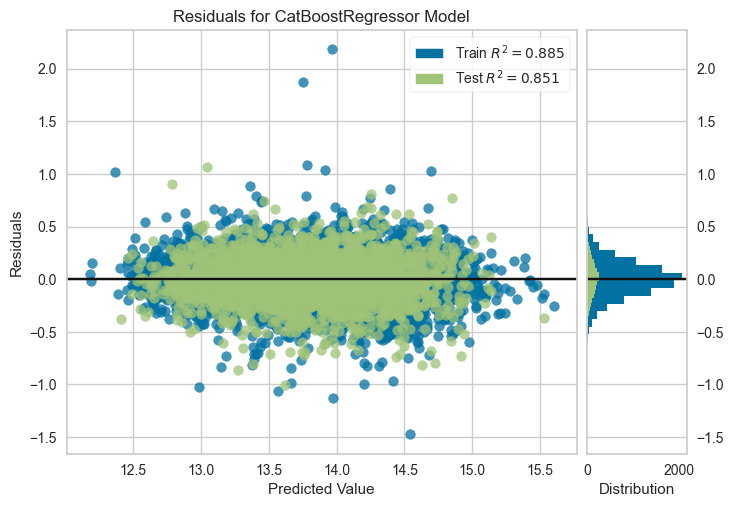

In [42]:
# Task 2, (3): plot residuals
plot_model(best_model, plot = 'residuals')

The residuals plot is designed to show difference between the model's predicted values and actual values (residuals). This is to evaluate whether the model has any systematic bias or patterns in the error. When the residuals are scattered around zero, it means the model does not exhibit any biased behaviour or unexplained patterns.

Based on the my residuals plot, I can see that the model's residuals are evenly distributed around zero. THis indicates that the model does not show any systematic error. The residuals are spread widely but do not appear to have a specific pattern, suggesting  that the model is able to fit the data well. 

Additionally, the training set was able to have a higher r-square value of **0.885** compared to the test set which is **0.851**. This suggests that the model performs slightly better on training data.

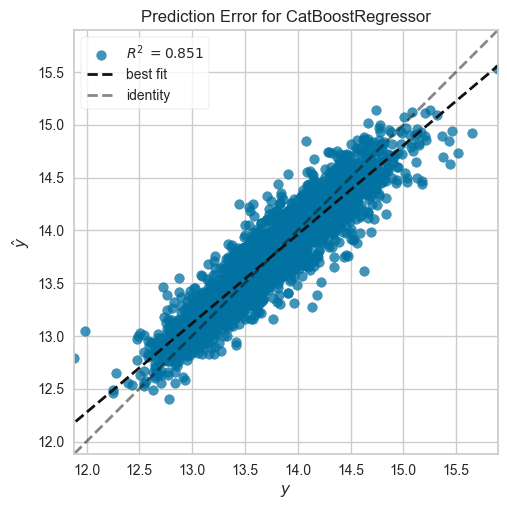

In [43]:
# Task 2, (3): plot error
plot_model(best_model, plot = 'error')

Prediction error plot is meant to represent the relationship between the predicted values and actual values. This is to help assess how well the model's predictions are when it comes to matching true values. The closer the points are to the identity line (where predicted equals actual), the better the model's performance.

In this case, the strong correlation of **0.851**  shows that the predictions are generally accurate with only minor deviations from the actual value, making the model pretty reliable. The best fit line is close to the idneity line which further suports mdoel's predicitve accuracy.

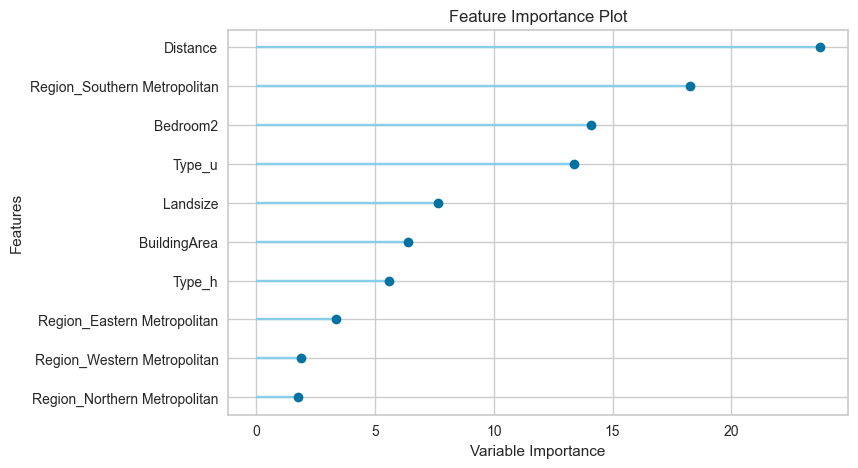

In [44]:
# Task 2, (3): plot feature importance
plot_model(best_model, plot = 'feature')

From the feature importance plot, it is clear that the `Distance` feature has the most significant impact on the model's predictions. This makes sense as location-related factors like distance from city centre does often influence housing prices even in real life. Other important features are the `Region` being `Southern Metropolitan` and the `Bedroom2` which is number of bedrooms, but their impact is still lower than the `Distance` feature. This chart helps to highlight the importance of location and number of rooms when it comes to predicting property prices. 

In [45]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1517,0.0419,0.2047,0.8373,0.0138,0.0110
1,0.1579,0.0447,0.2114,0.8424,0.0142,0.0114
2,0.1586,0.0484,0.2201,0.8332,0.0149,0.0115
3,0.1621,0.0502,0.2241,0.8207,0.0152,0.0118
4,0.1549,0.0422,0.2053,0.8515,0.0139,0.0113
5,0.1515,0.0434,0.2083,0.8377,0.0140,0.0110
6,0.1512,0.0396,0.1989,0.8485,0.0134,0.0110
7,0.1534,0.0408,0.2019,0.8490,0.0136,0.0111
8,0.1478,0.0398,0.1996,0.8597,0.0134,0.0107


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


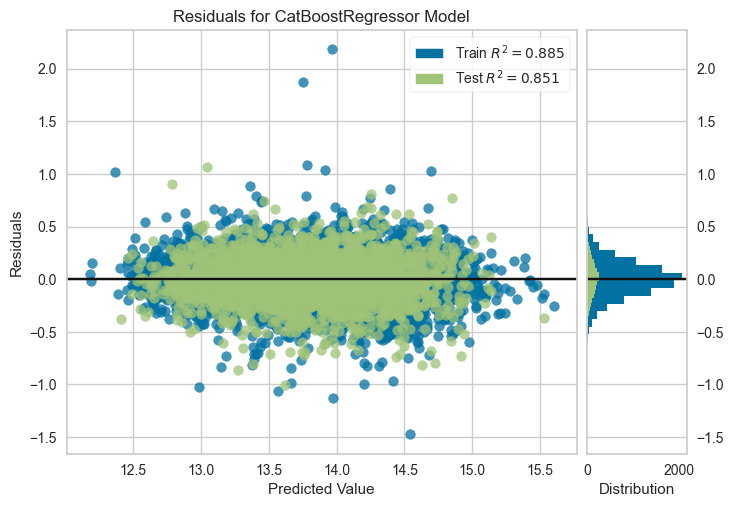

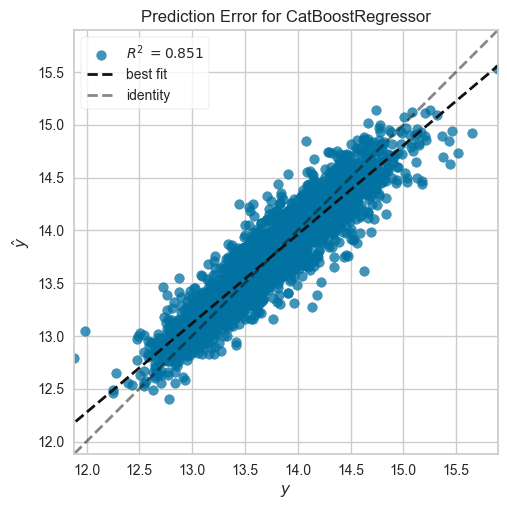

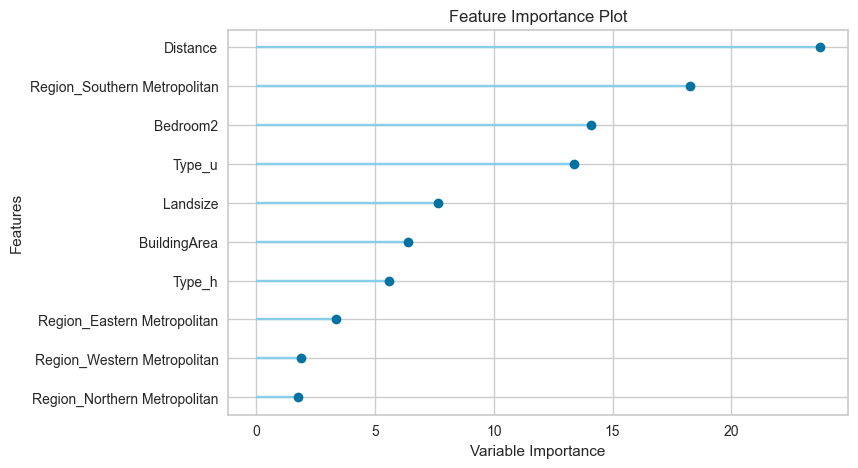

In [46]:
# Tune the best model
tuned_model = tune_model(best_model)

# Plot residuals for the tuned model
plot_model(tuned_model, plot='residuals')

# Plot error for the tuned model
plot_model(tuned_model, plot='error')

# Plot feature importance for the tuned model
plot_model(tuned_model, plot='feature')

In the above code, I attempted to further tune my model in order to achieve better performance. However, to my surprise, even after tuning, the tuned model performed the same as it did before tuning. This may be because the model initially was already performing close to its best, and the tuning did not lead to significant improvements. Additionally, the changes made during the tuning process could have been minor or did not target the key parameters influencing model performance. Another possibility is that the model was already capturing the underlying patterns of the data well, leaving little room for improvement.

In [47]:
#Task 2, (4): Predict on test set
holdout_pred = predict_model(best_model)  # Predict on the holdout/test set using the best model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1559,0.0423,0.2058,0.8509,0.0139,0.0113


In the above set of code, i did predicting on the unseen data. From theevlaution metrics, I can see that my best model, the CatBoost Regressir, obtained...

- Mean Absolute Error (MAE) : 0.1559
    - This is the average absolute difference between predicted and actual values, and the value shows that there is relatively small errors in prediction.
- Mean Squared Error (MSE): 0.0423
    - This represents the squared difference between predicted and actual values, lower value means better fit to the data.
- Root Mean Squared Error (RMSE): 0.2058
    - Provides an estimate of the standard deviation of the residuals (errors). A lower RMSE suggests the model is mroe accurate.
- R-squared: 0.8509
    - THis value indicates that approximately 85.09% of the variance in the target variable is explained by the model. This shows a strong fit to the data.
- Root Mean Squared Logarithmic Erorr (RMSLE): 0.0139
    - lower value, the better the model, especially for predicting relative errors.
- Mean Absolute Perecentage Error (MAPE): 0.0113
    - This indicates that the models predictions on average only deviates 1.13% from actual values, suggesting high prediction accuracy.

In [48]:
# Show predictions (including target, prediction, and residuals)
holdout_pred.head()

,Type,Region,Age,Distance,BuildingArea,Landsize,Bedroom2,Price,prediction_label
2475,h,Western Metropolitan,>100,10.500000,142.0,6.049734,3,13.253393,13.535935
2701,h,South-Eastern Metropolitan,71-80,20.799999,99.0,6.436151,3,13.531157,13.734097
7486,h,Western Metropolitan,71-80,9.700000,196.0,6.583409,3,14.220976,14.007138
10848,h,Western Metropolitan,NaN,9.700000,NaN,6.548219,3,13.815512,13.862784
1731,h,Southern Metropolitan,NaN,3.800000,NaN,4.882802,2,13.831877,14.030719


In [49]:
# Copy data and drop 'Price' column 
new_data = df.copy()  # Create a copy of the original data
new_data.drop('Price', axis=1, inplace=True)  

In [50]:
# Show the new data structure
new_data.head()

,Type,Region,Age,Distance,BuildingArea,Landsize,Bedroom2
0,t,Western Metropolitan,0-10,13.5,225.0,5.717028,3
1,h,Southern Metropolitan,>100,3.3,82.0,4.795791,2
2,h,Southern Metropolitan,NaN,3.3,NaN,5.075174,2
3,h,Northern Metropolitan,91-100,6.4,263.0,6.749931,3
4,h,Northern Metropolitan,11-20,6.4,NaN,5.342334,3


In [51]:
# Predict model on new_data (without 'price' column)
predictions = predict_model(best_model, data=new_data)  # Use the best model to predict on the new data

In [52]:
# Show predictions
predictions.head()  # Display the predictions for new_data

,Type,Region,Age,Distance,BuildingArea,Landsize,Bedroom2,prediction_label
0,t,Western Metropolitan,0-10,13.5,225.0,5.717028,3,13.565684
1,h,Southern Metropolitan,>100,3.3,82.0,4.795791,2,14.071092
2,h,Southern Metropolitan,NaN,3.3,NaN,5.075174,2,14.187767
3,h,Northern Metropolitan,91-100,6.4,263.0,6.749931,3,14.581697
4,h,Northern Metropolitan,11-20,6.4,NaN,5.342334,3,13.850260


In [53]:
#Task 2, (5): Saving pipeline
save_model(best_model, 'zhining_housing_prices_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Distance', 'BuildingArea',
                                              'Landsize', 'Bedroom2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Type', 'Region', 'Age'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Type', 'Region', 'Age'],
                                     transformer=OneHotEncoder(cols=['Type',
                                                                     'Region',
                                                                     'Age'],
                                                               handle_missing='return_nan',
                                                               use_ca

In [54]:
# # #start mlflow server on localhost:5000
# !mlflow ui